# Dataset Analysis – THAI-MOD Multilingual Online Toxicity Detection

This notebook explores all 8 datasets used in the THAI-MOD project.  
For each dataset we show:
- **Example data** (`df.head()`)
- **Size** (number of rows)
- **Label distribution** (pie chart)

---

| # | Dataset | Language | Source |
|---|---------|----------|--------|
| 1 | Wisesight Sentiment Dataset | Thai | PyThaiNLP/wisesight-sentiment |
| 2 | Thai Toxicity Tweet Corpus | Thai | SEACrowd / tmu-nlp |
| 3 | HateThaiSent | Thai | dsmlr/HateThaiSent |
| 4 | Thai Sentiment Analysis Dataset | Thai | PyThaiNLP |
| 5 | Thai Cyberbullying LGBT Dataset | Thai | tiya1012 |
| 6 | Jigsaw Toxic Comment Classification | English | Kaggle / Hugging Face |
| 7 | Hate Speech Dataset for Social Media | English | Kaggle – ziya07 |
| 8 | Hate Speech and Offensive Language Dataset | English | Kaggle – mrmorj |


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

# ── shared colour scheme ──────────────────────────────────────────────────────
LABEL_COLORS = {
    'pos': '#4CAF50',   # green
    'neu': '#2196F3',   # blue
    'neg': '#F44336',   # red
}

def label_colors(labels):
    """Return colour list for given label sequence."""
    return [LABEL_COLORS.get(l, '#9E9E9E') for l in labels]

def plot_distribution(series, title, ax):
    counts = series.value_counts()
    colors = label_colors(counts.index.tolist())
    wedges, texts, autotexts = ax.pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops=dict(edgecolor='white', linewidth=1.5)
    )
    for t in texts:   t.set_fontsize(11)
    for a in autotexts: a.set_fontsize(10)
    ax.set_title(title, fontsize=13, fontweight='bold', pad=12)
    return counts

matplotlib.rcParams['font.family'] = ['Tahoma', 'DejaVu Sans', 'sans-serif']
pd.set_option('display.max_colwidth', 100)
print('Setup complete.')


Setup complete.


---
## Dataset 1 – Wisesight Sentiment Dataset (Thai)

**Source:** [PyThaiNLP/wisesight-sentiment](https://github.com/PyThaiNLP/wisesight-sentiment)  
**Description:** Large collection of Thai social-media texts labelled for sentiment (positive / neutral / negative).

In [101]:
df1 = pd.read_csv('dataset1.csv')
print(f'Dataset 1 – Size: {len(df1):,} rows  |  Columns: {list(df1.columns)}')
print('─' * 60)
df1.head()

Dataset 1 – Size: 23,545 rows  |  Columns: ['category', 'texts', 'length']
────────────────────────────────────────────────────────────


,category,texts,length
0,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,9
1,neg,เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีน...,127
2,neg,เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ,11
3,neg,ลิปมันของเเบร์น Mistine ราคากลาง ๆ ไม่แพงมาก ราคาสามารถเอื้อมถึงได้ #LASHESactivity,23
4,neg,ทำไมมันไม่มีโปรให้เร๊าาาาาา,7


Label distribution:
category
neu    13105
neg     6140
pos     4300


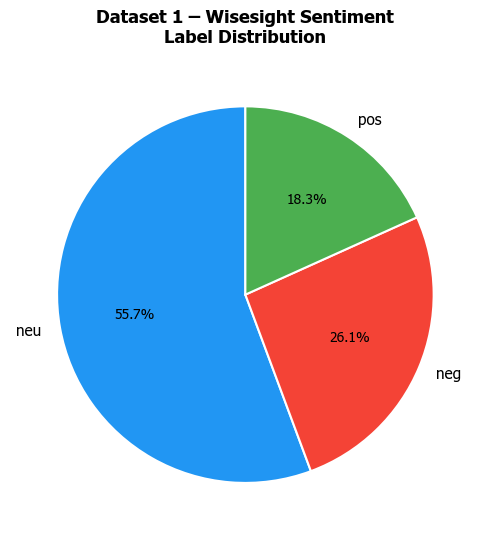

In [102]:
print('Label distribution:')
print(df1['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df1['category'], 'Dataset 1 – Wisesight Sentiment\nLabel Distribution', ax)
plt.tight_layout()
plt.show()

---
## Dataset 2 – Thai Toxicity Tweet Corpus

**Source:** [SEACrowd / tmu-nlp](https://huggingface.co/datasets/SEACrowd/thai_toxicity_tweet)  
**Description:** ~3,300 Thai tweets collected via toxicity-related keywords and manually annotated (toxic / non-toxic).

In [103]:
df2 = pd.read_csv('dataset2.csv')

print(f'Dataset 2 – Size: {len(df2):,} rows  |  Columns: {list(df2.columns)}')
print('─' * 60)
df2.head()

Dataset 2 – Size: 2,160 rows  |  Columns: ['category', 'texts', 'length']
────────────────────────────────────────────────────────────


,category,texts,length
0,neu,วันๆ นี่คุยกะหมา แมว หมู ไก่ ม้า ควาย มากกว่าคุยกับคนไปละ,8
1,neu,หล่อมากกก หล่อวัวตายควายล้มกันเลยทีเดียวววว,2
2,neu,สิวเหี้ยไรขึ้นหลังหู เสียชาติเกิดมั้ย เกิดมามันต้องต้องโดดเด่นเด้งดึ๋งอย่าเช่นขึ้นที่หน้าไรงี้ อ...,4
3,neu,อ่ะ ป่วยก็ป่วย งานจ้างก็ต้องทำ งานเรียนก็ต้องทำ วิชาดีไซน์ตัวร้ายกับควายอย่างกูเอง,5
4,neg,นี่ก็เพิ่งรู้ว่า เกิดชาตินี้ชาติเดียว เป็นทั้ง เหี้ย เป็นทั้ง ควาย เลย คุ้มแท้ๆ 😆,9


Label distribution:
category
neg    1332
neu     828


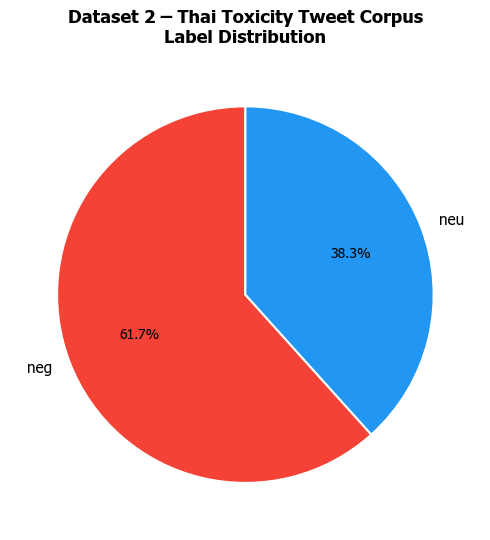

In [104]:
print('Label distribution:')
print(df2['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df2['category'], 'Dataset 2 – Thai Toxicity Tweet Corpus\nLabel Distribution', ax)
plt.tight_layout()
plt.show()

---
## Dataset 3 – HateThaiSent

**Source:** [dsmlr/HateThaiSent](https://github.com/dsmlr/HateThaiSent)  
**Description:** 7,597 Thai social-media messages annotated for hate speech AND sentiment (positive / neutral / negative), enabling multi-task modelling.

In [105]:
df3 = pd.read_csv('dataset3.csv')

print(f'Dataset 3 – Size: {len(df3):,} rows  |  Columns: {list(df3.columns)}')
print('─' * 60)
df3.head()

Dataset 3 – Size: 4,953 rows  |  Columns: ['category', 'texts', 'length']
────────────────────────────────────────────────────────────


,category,texts,length
0,neu,(N)(E)(W) (Y)(E)(A)(R) ZPNB04: ทัวร์เพชรบูรณ์ เขาค้อ ปีใหม่สุดปัง! พักเขาค้อสุดฟิน! 3วัน 2คืน เด...,111
1,neu,ปีใหม่เที่ยวเขาค้อ 2 ที่สุดท้าย ZPNB04: ทัวร์เพชรบูรณ์ เขาค้อ ปีใหม่สุดปัง! พักเขาค้อสุดฟิน! 3วั...,99
2,neu,*PTL-EV02* *ทัวร์รถตู้ อุดรธานี 3 วัน 1 คืน* *วังนาคินทร์คำชะโนด* เดินทาง ม.ค. - มี.ค. 64 ราคาเร...,69
3,neu,*PTL-EV03* *ทัวร์รถตู้ เลย-เชียงคาน 3 วัน 1 คืน* *ฟูจิเมืองไทย ถนนคนเดินเชียงคาน สกายวอร์คเชียงค...,75
4,neg,"*ติดจริงน่าจะเกิน 5000หรือทะลุ 10,000 คน เพราะพวกพม่ารามัญยกทัพมาตั้งค่ายที่สมุทรสาครเกินหลักล้า...",9


Label distribution:
category
neu    2890
pos    1538
neg     525


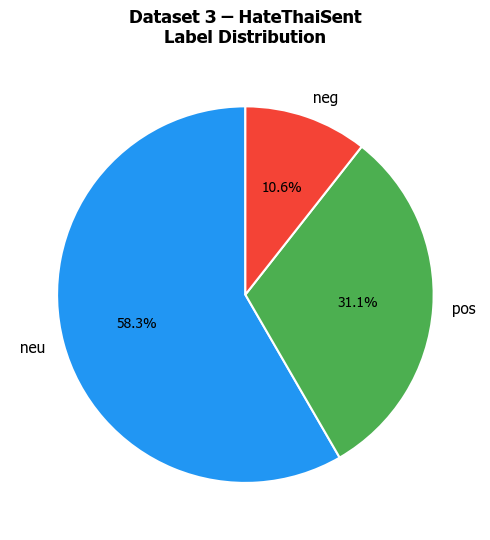

In [106]:
print('Label distribution:')
print(df3['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df3['category'], 'Dataset 3 – HateThaiSent\nLabel Distribution', ax)
plt.tight_layout()
plt.show()

---
## Dataset 4 – Thai Sentiment Analysis Dataset

**Source:** [PyThaiNLP/thai-sentiment-analysis-dataset](https://github.com/PyThaiNLP/thai-sentiment-analysis-dataset)  
**Description:** Thai social-media texts labelled for sentiment (negative / positive) by PyThaiNLP.


In [107]:
df4 = pd.read_csv('dataset4.csv')

print(f'Dataset 4 – Size: {len(df4):,} rows  |  Columns: {list(df4.columns)}')
print('─' * 60)
df4.head()

Dataset 4 – Size: 341 rows  |  Columns: ['category', 'texts', 'length']
────────────────────────────────────────────────────────────


,category,texts,length
0,neg,มึงกล้าพูดรึป่าวว่าระบบการศึกษามันดีอ่ะ ถุ้ยเฟสยังปลอมเลยสัส,17
1,neg,เบื่อเวลามาโพสตไรแบบนี้ชอบเป็นพวกที่ใช่โปรไฟล์อื่นที่ไม่ใช่โปรไฟล์ตัวเอง เสือกไม่ลึกค่ะแบบนี้ เส...,29
2,neg,พ่อมึงเป็นติ่งรัฐบาลหรอสัส ที่เรียกเก็บตังแพงมันจะเอาไปใช้ไปแดกกันเองอะแหละ ควย,25
3,neg,ใครก็ช่วยลบไอ้นี้ออกจากกลุ่มหน่อยครับ มันมาโพสต์เกรียนกวนส้นตีน แน่จริงมึงกล้าเอาเฟสจริงมาโพสต์ไหม,27
4,neg,เครียดมากอะตอนนี้,4


Label distribution:
category
neg    193
pos    148


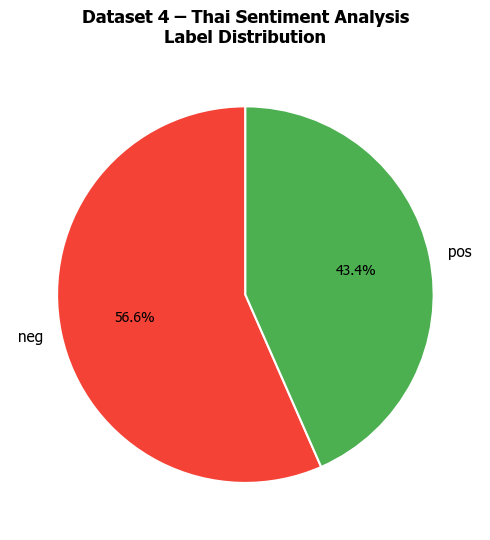

In [108]:
print('Label distribution:')
print(df4['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df4['category'], 'Dataset 4 – Thai Sentiment Analysis\nLabel Distribution', ax)
plt.tight_layout()
plt.show()


---
## Dataset 5 – Thai Cyberbullying LGBT Dataset

**Source:** [tiya1012/thai_cyberbullying_lgbt](https://github.com/tiya1012/thai_cyberbullying_lgbt/blob/main/cleaned_thai_cyberbullying.csv)  
**Description:** Thai social-media texts labelled for cyberbullying targeting the LGBT community (negative / neutral).


In [109]:
df5 = pd.read_csv('dataset5.csv')

print(f'Dataset 5 – Size: {len(df5):,} rows  |  Columns: {list(df5.columns)}')
print('─' * 60)
df5.head()

Dataset 5 – Size: 16,749 rows  |  Columns: ['category', 'texts', 'length']
────────────────────────────────────────────────────────────


,category,texts,length
0,neg,อิตุ๊ดมึงยังไม่ได้ดูคอนผัวเลยอิสัส,11
1,neu,ยอนโฮเหล่าเวร์เรอร์แฮปปี้เวรี่คริสต์มาสหวังว่าทุกคนจะได้ทานของอร่อยๆเยอะๆได้สร้างความทรงจำที่ดีๆ...,42
2,neu,แฮปปี้เฉาก๊วยเหนียวหนึบหวานเย็นชื่นใจ,5
3,neg,ให้อิตุ๊ดดูชอบตบอิเก๋,8
4,neg,อิตุ๊ดใครเมียมึง,5


Label distribution:
category
neg    8890
neu    7859


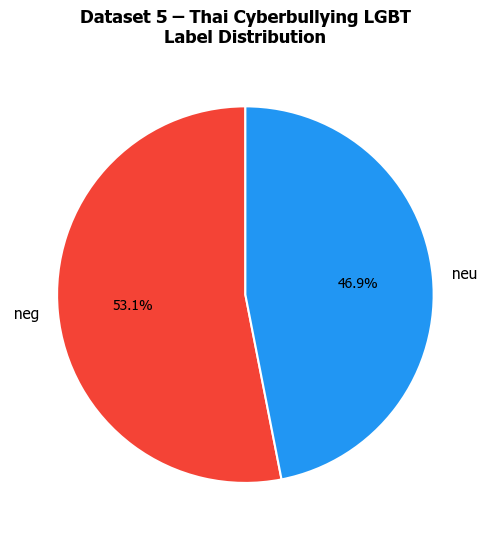

In [110]:
print('Label distribution:')
print(df5['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df5['category'], 'Dataset 5 – Thai Cyberbullying LGBT\nLabel Distribution', ax)
plt.tight_layout()
plt.show()


---
## Dataset 6 – Jigsaw Toxic Comment Classification Challenge

**Source:** [Hugging Face – thesofakillers/jigsaw-toxic-comment-classification-challenge](https://huggingface.co/datasets/thesofakillers/jigsaw-toxic-comment-classification-challenge)  
**Description:** ~160 k Wikipedia comments with multi-label toxicity annotations. Preprocessed here as binary neutral / negative.

In [111]:
df6 = pd.read_csv('dataset6.csv')

print(f'Dataset 6 – Size: {len(df6):,} rows  |  Columns: {list(df6.columns)}')
print('─' * 60)
df6.head()

Dataset 6 – Size: 159,571 rows  |  Columns: ['category', 'texts', 'length']
────────────────────────────────────────────────────────────


,category,texts,length
0,neu,Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They were...,43
1,neu,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January...",17
2,neu,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",42
3,neu,""" More I can't make any real suggestions on improvement - I wondered if the section statistics s...",113
4,neu,"You, sir, are my hero. Any chance you remember what page that's on?",13


Label distribution:
category
neu    143346
neg     16225


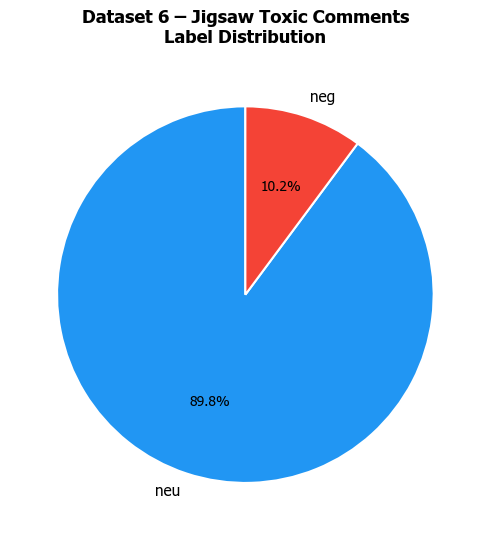

In [112]:
print('Label distribution:')
print(df6['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df6['category'], 'Dataset 6 – Jigsaw Toxic Comments\nLabel Distribution', ax)
plt.tight_layout()
plt.show()

---
## Dataset 7 – Hate Speech Dataset for Social Media

**Source:** [Kaggle – ziya07/hate-speech-detection-dataset-for-social-media](https://www.kaggle.com/datasets/ziya07/hate-speech-detection-dataset-for-social-media)  
**Description:** ~1.8 k synthetic Twitter/Reddit posts labelled neutral / negative (offensive/hateful).

In [113]:
df7 = pd.read_csv('dataset7.csv')

print(f'Dataset 7 – Size: {len(df7):,} rows  |  Columns: {list(df7.columns)}')
print('─' * 60)
df7.head()

Dataset 7 – Size: 1,829 rows  |  Columns: ['category', 'texts', 'length']
────────────────────────────────────────────────────────────


,category,texts,length
0,neg,Quickly city or call score standard want. These people are hate!,11
1,neg,Thought fund whole me. You are such a dumb!,9
2,neg,Close establish table remember us. You are such a stupid!,10
3,neg,Office activity between note analysis series our. These people are plague!,11
4,neg,Attention stay ever international available. You are such a stupid!,10


Label distribution:
category
neg    915
neu    914


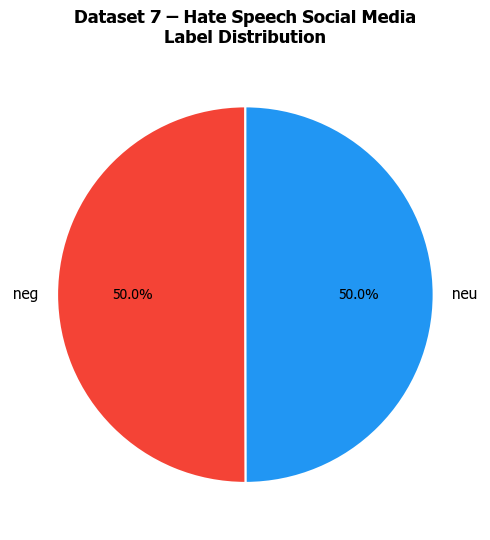

In [114]:
print('Label distribution:')
print(df7['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df7['category'], 'Dataset 7 – Hate Speech Social Media\nLabel Distribution', ax)
plt.tight_layout()
plt.show()

---
## Dataset 8 – Hate Speech and Offensive Language Dataset

**Source:** [Kaggle – mrmorj/hate-speech-and-offensive-language-dataset](https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset)  
**Description:** ~25 k Twitter posts labelled as hate speech, offensive language, or neither. Consolidated here as negative / neutral.

In [115]:
summary = [
    {'Dataset': 'Dataset 1 – Wisesight Sentiment',              'Language': 'Thai',    'Labels': 'pos / neu / neg', 'Total Rows': len(df1)},
    {'Dataset': 'Dataset 2 – Thai Toxicity Tweet Corpus',       'Language': 'Thai',    'Labels': 'neg / neu',       'Total Rows': len(df2)},
    {'Dataset': 'Dataset 3 – HateThaiSent',                     'Language': 'Thai',    'Labels': 'pos / neu / neg', 'Total Rows': len(df3)},
    {'Dataset': 'Dataset 4 – Thai Sentiment Analysis',          'Language': 'Thai',    'Labels': 'neg / pos',       'Total Rows': len(df4)},
    {'Dataset': 'Dataset 5 – Thai Cyberbullying LGBT',          'Language': 'Thai',    'Labels': 'neg / neu',       'Total Rows': len(df5)},
    {'Dataset': 'Dataset 6 – Jigsaw Toxic Comments',            'Language': 'English', 'Labels': 'neu / neg',       'Total Rows': len(df6)},
    {'Dataset': 'Dataset 7 – Hate Speech Social Media',         'Language': 'English', 'Labels': 'neg / neu',       'Total Rows': len(df7)},
    {'Dataset': 'Dataset 8 – Hate Speech & Offensive Language', 'Language': 'English', 'Labels': 'neg / neu',       'Total Rows': len(df8)},
]

summary_df = pd.DataFrame(summary)
summary_df['Total Rows'] = summary_df['Total Rows'].apply(lambda x: f'{x:,}')
summary_df.set_index('Dataset', inplace=True)
summary_df


,Language,Labels,Total Rows
Dataset,,,
Dataset 1 – Wisesight Sentiment,Thai,pos / neu / neg,"23,545"
Dataset 2 – Thai Toxicity Tweet Corpus,Thai,neg / neu,"2,160"
Dataset 3 – HateThaiSent,Thai,pos / neu / neg,"4,953"
Dataset 4 – Thai Sentiment Analysis,Thai,neg / pos,341
Dataset 5 – Thai Cyberbullying LGBT,Thai,neg / neu,"16,749"
Dataset 6 – Jigsaw Toxic Comments,English,neu / neg,"159,571"
Dataset 7 – Hate Speech Social Media,English,neg / neu,"1,829"
Dataset 8 – Hate Speech & Offensive Language,English,neg / neu,"24,783"


Label distribution:
category
neg    20620
neu     4163


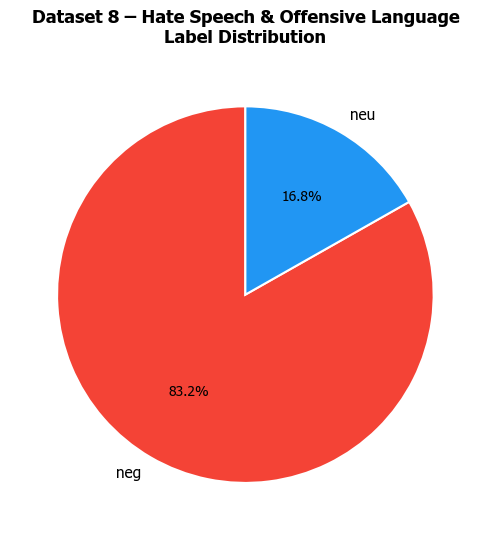

In [116]:
print('Label distribution:')
print(df8['category'].value_counts().to_string())

fig, ax = plt.subplots(figsize=(5.5, 5.5))
plot_distribution(df8['category'], 'Dataset 8 – Hate Speech & Offensive Language\nLabel Distribution', ax)
plt.tight_layout()
plt.show()

---
## Summary – All Datasets

In [117]:
summary = [
    {'Dataset': 'Dataset 1 – Wisesight Sentiment',              'Language': 'Thai',    'Labels': 'pos / neu / neg', 'Total Rows': len(df1)},
    {'Dataset': 'Dataset 2 – Thai Toxicity Tweet Corpus',       'Language': 'Thai',    'Labels': 'neg / neu',       'Total Rows': len(df2)},
    {'Dataset': 'Dataset 3 – HateThaiSent',                     'Language': 'Thai',    'Labels': 'pos / neu / neg', 'Total Rows': len(df3)},
    {'Dataset': 'Dataset 4 – Thai Cyberbullying LGBT',          'Language': 'Thai',    'Labels': 'neg / pos',       'Total Rows': len(df4)},
    {'Dataset': 'Dataset 5 – Thai Sentiment Analysis',          'Language': 'Thai',    'Labels': 'neg / neu',       'Total Rows': len(df5)},
    {'Dataset': 'Dataset 6 – Jigsaw Toxic Comments',            'Language': 'English', 'Labels': 'neu / neg',       'Total Rows': len(df6)},
    {'Dataset': 'Dataset 7 – Hate Speech Social Media',         'Language': 'English', 'Labels': 'neg / neu',       'Total Rows': len(df7)},
    {'Dataset': 'Dataset 8 – Hate Speech & Offensive Language', 'Language': 'English', 'Labels': 'neg / neu',       'Total Rows': len(df8)},
]

summary_df = pd.DataFrame(summary)
summary_df['Total Rows'] = summary_df['Total Rows'].apply(lambda x: f'{x:,}')
summary_df.set_index('Dataset', inplace=True)
summary_df

,Language,Labels,Total Rows
Dataset,,,
Dataset 1 – Wisesight Sentiment,Thai,pos / neu / neg,"23,545"
Dataset 2 – Thai Toxicity Tweet Corpus,Thai,neg / neu,"2,160"
Dataset 3 – HateThaiSent,Thai,pos / neu / neg,"4,953"
Dataset 4 – Thai Cyberbullying LGBT,Thai,neg / pos,341
Dataset 5 – Thai Sentiment Analysis,Thai,neg / neu,"16,749"
Dataset 6 – Jigsaw Toxic Comments,English,neu / neg,"159,571"
Dataset 7 – Hate Speech Social Media,English,neg / neu,"1,829"
Dataset 8 – Hate Speech & Offensive Language,English,neg / neu,"24,783"


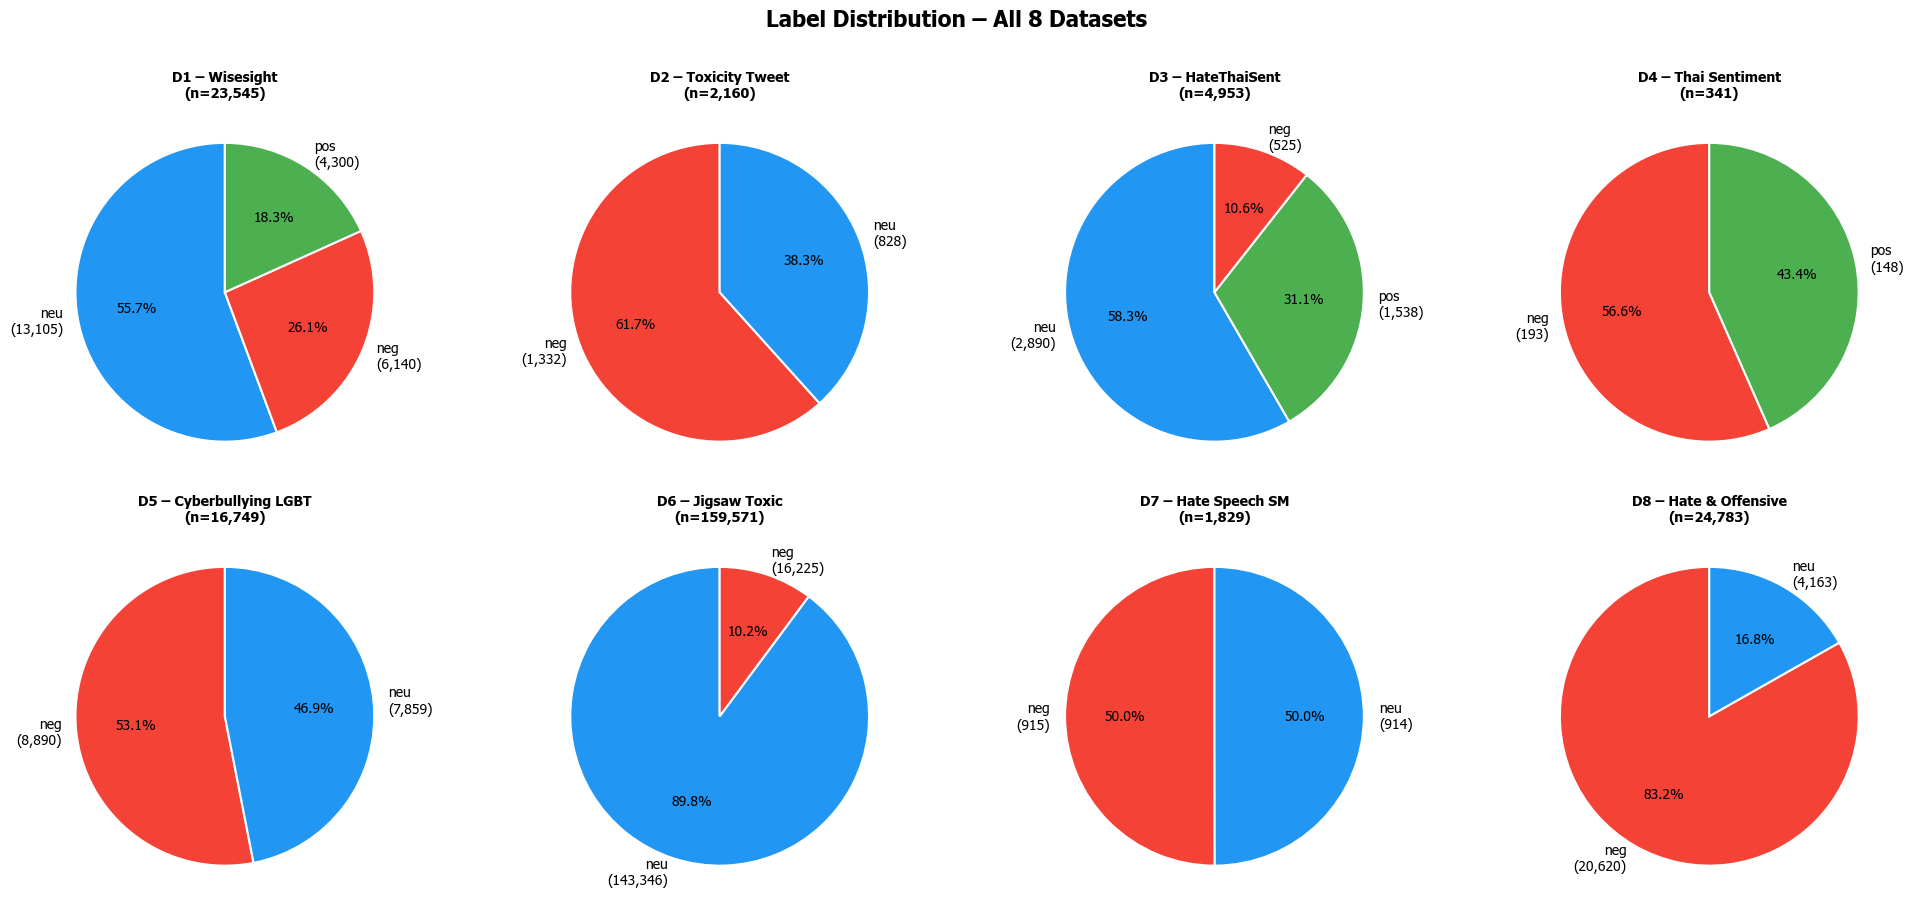

In [118]:
# ── Combined overview: all pie charts in one figure ───────────────────────────
datasets = [
    (df1, 'category', 'D1 – Wisesight'),
    (df2, 'category', 'D2 – Toxicity Tweet'),
    (df3, 'category', 'D3 – HateThaiSent'),
    (df4, 'category', 'D4 – Thai Sentiment'),
    (df5, 'category', 'D5 – Cyberbullying LGBT'),
    (df6, 'category', 'D6 – Jigsaw Toxic'),
    (df7, 'category', 'D7 – Hate Speech SM'),
    (df8, 'category', 'D8 – Hate & Offensive'),
]

fig, axes = plt.subplots(2, 4, figsize=(20, 9))
fig.suptitle('Label Distribution – All 8 Datasets', fontsize=16, fontweight='bold', y=1.01)

for ax, (df, col, title) in zip(axes.flatten(), datasets):
    counts = df[col].value_counts()
    colors = label_colors(counts.index.tolist())
    ax.pie(
        counts.values,
        labels=[f'{l}\n({v:,})' for l, v in zip(counts.index, counts.values)],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops=dict(edgecolor='white', linewidth=1.5)
    )
    ax.set_title(f'{title}\n(n={len(df):,})', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


---
# Section 2.2 – Thai Combined Dataset: Data Type & Size

## Goal
Merge **Dataset 1–5 (Thai)** into a single unified DataFrame with binary labels:

| Original label | Meaning | → Binary label | Class name |
|---|---|---|---|
| `pos` | Positive sentiment | `0` | non-toxic |
| `neu` | Neutral | `0` | non-toxic |
| `neg` | Negative / toxic / hate | `1` | toxic |

### Dataset label breakdown before mapping

| # | Dataset | Labels present |
|---|---------|---------------|
| 1 | Wisesight Sentiment | pos / neu / neg |
| 2 | Thai Toxicity Tweet Corpus | neu / neg |
| 3 | HateThaiSent | pos / neu / neg |
| 4 | Thai Sentiment Analysis | pos / neg |
| 5 | Thai Cyberbullying LGBT | neu / neg |

### Steps
1. Load each CSV
2. Standardise text column name → `texts` (all datasets now use `texts`)
3. Map labels to binary (neg=1, pos/neu=0)
4. Add `source` column for traceability
5. Concatenate → `df_thai`
6. Show shape, sample rows, and text-length distribution


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

# ── Label mapping: neg → 1 (toxic), pos/neu → 0 (non-toxic) ──────────────────
LABEL_MAP = {'neg': 1, 'pos': 0, 'neu': 0}

# ── Load & standardize each Thai dataset ─────────────────────────────────────
# All datasets now use 'texts' as the text column
configs = [
    ('dataset1.csv', 'texts', 'Wisesight Sentiment'),
    ('dataset2.csv', 'texts', 'Thai Toxicity Tweet Corpus'),
    ('dataset3.csv', 'texts', 'HateThaiSent'),
    ('dataset4.csv', 'texts', 'Thai Sentiment Analysis'),     # 341 rows
    ('dataset5.csv', 'texts', 'Thai Cyberbullying LGBT'),     # 16,749 rows
]

pieces = []
for filename, text_col, source_name in configs:
    tmp = pd.read_csv(filename)
    # Standardise text column → 'text'
    tmp = tmp.rename(columns={text_col: 'text'})
    # Keep only what we need
    tmp = tmp[['category', 'text']].copy()
    # Map to binary
    tmp['label'] = tmp['category'].map(LABEL_MAP)
    # Tag source
    tmp['source'] = source_name
    pieces.append(tmp)

# ── Concatenate ───────────────────────────────────────────────────────────────
df_thai = pd.concat(pieces, ignore_index=True)

# Drop any rows where label mapping failed (shouldn't happen, but safety check)
df_thai = df_thai.dropna(subset=['label'])
df_thai['label'] = df_thai['label'].astype(int)

print('✔  Thai combined dataset created.')
print(f'   Rows: {len(df_thai):,}')
print(f'   Columns: {list(df_thai.columns)}')


✔  Thai combined dataset created.
   Rows: 47,748
   Columns: ['category', 'text', 'label', 'source']


### Data Type & Size — `df.shape`
1 row = 1 comment / text message

In [120]:
print('=' * 55)
print(f'  Total rows (Thai datasets 1–5) : {df_thai.shape[0]:>8,}')
print(f'  Total columns                  : {df_thai.shape[1]:>8}')
print('=' * 55)
print()
print('Column dtypes:')
print(df_thai.dtypes.to_string())
print()
print('Per-source row count:')
print(df_thai['source'].value_counts().to_string())


  Total rows (Thai datasets 1–5) :   47,748
  Total columns                  :        4

Column dtypes:
category    object
text        object
label        int32
source      object

Per-source row count:
source
Wisesight Sentiment           23545
Thai Cyberbullying LGBT       16749
HateThaiSent                   4953
Thai Toxicity Tweet Corpus     2160
Thai Sentiment Analysis         341


### Example 5 rows (`df.head()`)
`label`: **0 = non-toxic**, **1 = toxic**

In [121]:
# Display first 5 rows with label meanings shown
display_df = df_thai[['text', 'category', 'label', 'source']].head(5).copy()
display_df['label_name'] = display_df['label'].map({0: 'non-toxic', 1: 'toxic'})
display_df


,text,category,label,source,label_name
0,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg,1,Wisesight Sentiment,toxic
1,เน็ตควายมากกูพูดจริงเสียดายตังค์ที่ติดตั้งเน็ตโครตห่วยยิ่งดึกๆเน็ตยิ่งห่วยตอนมาติดตั้งใหม่ๆก็ดีน...,neg,1,Wisesight Sentiment,toxic
2,เหล้าเบลล์รสชาติเหี้ยสุด จะไม่แดกอีกละ,neg,1,Wisesight Sentiment,toxic
3,ลิปมันของเเบร์น Mistine ราคากลาง ๆ ไม่แพงมาก ราคาสามารถเอื้อมถึงได้ #LASHESactivity,neg,1,Wisesight Sentiment,toxic
4,ทำไมมันไม่มีโปรให้เร๊าาาาาา,neg,1,Wisesight Sentiment,toxic


### Label Distribution — Thai Combined Dataset (toxic vs non-toxic)

Binary label counts:
  non-toxic (0)     :  30,668  (64.2%)
  toxic (1)         :  17,080  (35.8%)
  Total             :  47,748


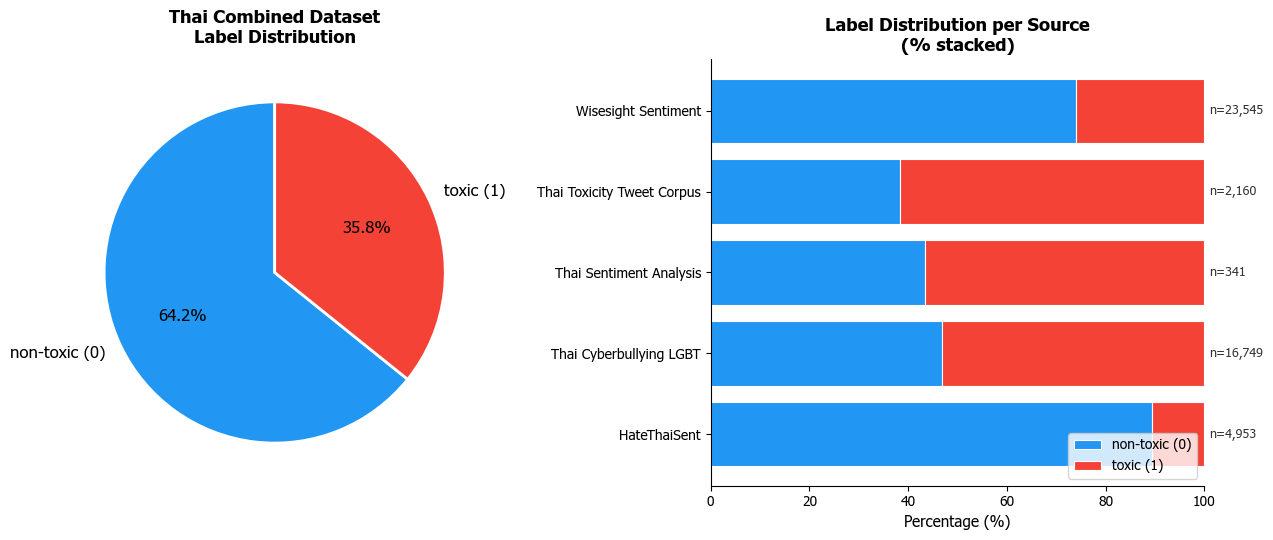

In [122]:
label_counts = df_thai['label'].value_counts().sort_index()
label_names  = {0: 'non-toxic (0)', 1: 'toxic (1)'}
colors_bin   = ['#2196F3', '#F44336']   # blue = non-toxic, red = toxic

print('Binary label counts:')
for k, v in label_counts.items():
    pct = v / len(df_thai) * 100
    print(f'  {label_names[k]:18s}: {v:7,}  ({pct:.1f}%)')
print(f'  {"Total":18s}: {len(df_thai):7,}')

fig, axes = plt.subplots(1, 2, figsize=(13, 5.5))

# ── Pie chart ─────────────────────────────────────────────────────────────────
ax_pie = axes[0]
wedges, texts, autotexts = ax_pie.pie(
    label_counts.values,
    labels=[label_names[k] for k in label_counts.index],
    autopct='%1.1f%%',
    colors=colors_bin,
    startangle=90,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    textprops=dict(fontsize=12)
)
for a in autotexts: a.set_fontsize(12)
ax_pie.set_title('Thai Combined Dataset\nLabel Distribution', fontsize=13, fontweight='bold', pad=12)

# ── Stacked bar by source ─────────────────────────────────────────────────────
ax_bar = axes[1]
pivot = df_thai.groupby(['source', 'label']).size().unstack(fill_value=0)
pivot.columns = [label_names[c] for c in pivot.columns]
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

bottom = None
bar_colors = [colors_bin[0], colors_bin[1]]
bars = []
for i, col in enumerate(pivot_pct.columns):
    b = ax_bar.barh(pivot_pct.index, pivot_pct[col],
                    left=bottom, color=bar_colors[i], edgecolor='white', linewidth=0.8)
    bars.append(b)
    bottom = pivot_pct[col] if bottom is None else bottom + pivot_pct[col]

ax_bar.set_xlabel('Percentage (%)', fontsize=11)
ax_bar.set_title('Label Distribution per Source\n(% stacked)', fontsize=13, fontweight='bold')
ax_bar.legend(pivot_pct.columns, loc='lower right', fontsize=10)
ax_bar.set_xlim(0, 100)
for spine in ['top', 'right']: ax_bar.spines[spine].set_visible(False)

# Add count annotations on bars
for i, (src, row) in enumerate(pivot.iterrows()):
    total = row.sum()
    ax_bar.text(101, i, f'n={total:,}', va='center', fontsize=9, color='#333')

plt.tight_layout()
plt.show()


### Text Length Distribution (tweet-style short text)
Text lengths are measured in **number of tokens** using `word_tokenize` (PyThaiNLP `newmm` engine).


Tokenizing texts (this may take a moment)...
Done.

Text length statistics (token count):
             count  mean   std  min  25%   50%   75%     max
label                                                       
non-toxic  30668.0  31.7  98.0  1.0  5.0  11.0  25.0  2416.0
toxic      17080.0  20.7  29.1  1.0  8.0  14.0  26.0  1205.0


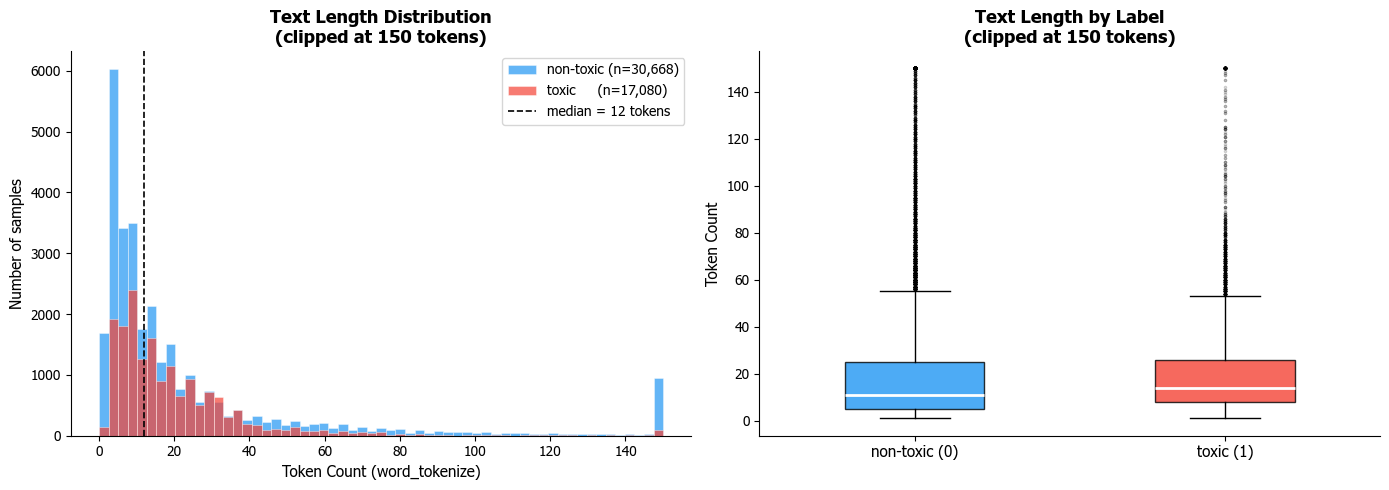


89.9% of texts have ≤ 50 tokens (tweet-style length)


In [125]:
import numpy as np
from pythainlp.tokenize import word_tokenize

# Tokenize using PyThaiNLP newmm engine → count tokens per text
print('Tokenizing texts (this may take a moment)...')
df_thai['token_count'] = df_thai['text'].astype(str).apply(
    lambda t: len(word_tokenize(t, engine='newmm', keep_whitespace=False))
)
print('Done.')

toxic     = df_thai[df_thai['label'] == 1]['token_count']
non_toxic = df_thai[df_thai['label'] == 0]['token_count']

# Summary statistics
stats = df_thai.groupby('label')['token_count'].describe().rename(index={0: 'non-toxic', 1: 'toxic'})
print('\nText length statistics (token count):')
print(stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(1).to_string())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ── Histogram ─────────────────────────────────────────────────────────────────
ax1 = axes[0]
bins = np.linspace(0, 150, 60)
ax1.hist(non_toxic.clip(upper=150), bins=bins, alpha=0.7, color='#2196F3',
         label=f'non-toxic (n={len(non_toxic):,})', edgecolor='white', linewidth=0.4)
ax1.hist(toxic.clip(upper=150),     bins=bins, alpha=0.7, color='#F44336',
         label=f'toxic     (n={len(toxic):,})',     edgecolor='white', linewidth=0.4)
ax1.axvline(df_thai['token_count'].median(), color='black', linestyle='--', linewidth=1.2,
            label=f'median = {df_thai["token_count"].median():.0f} tokens')
ax1.set_xlabel('Token Count (word_tokenize)', fontsize=11)
ax1.set_ylabel('Number of samples', fontsize=11)
ax1.set_title('Text Length Distribution\n(clipped at 150 tokens)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
for s in ['top', 'right']: ax1.spines[s].set_visible(False)

# ── Box plot by label ─────────────────────────────────────────────────────────
ax2 = axes[1]
data_to_plot = [
    non_toxic.clip(upper=150).values,
    toxic.clip(upper=150).values,
]
bp = ax2.boxplot(data_to_plot, patch_artist=True, widths=0.45,
                 medianprops=dict(color='white', linewidth=2))
bp['boxes'][0].set_facecolor('#2196F3')
bp['boxes'][1].set_facecolor('#F44336')
for patch in bp['boxes']: patch.set_alpha(0.8)
for flier in bp['fliers']: flier.set(marker='.', alpha=0.2, markersize=3)

ax2.set_xticklabels(['non-toxic (0)', 'toxic (1)'], fontsize=11)
ax2.set_ylabel('Token Count', fontsize=11)
ax2.set_title('Text Length by Label\n(clipped at 150 tokens)', fontsize=13, fontweight='bold')
for s in ['top', 'right']: ax2.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

# Tweet-style check: % of texts ≤ 50 tokens (typical short Thai tweet)
pct_tweet = (df_thai['token_count'] <= 50).mean() * 100
print(f'\n{pct_tweet:.1f}% of texts have ≤ 50 tokens (tweet-style length)')
